In [1]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
import seaborn as sns


az.style.use('arviz-darkgrid')

In [2]:
WAFFLE_DATA = 'waffle_divorce.csv'
DATA_FOLDER = '../../data'

In [3]:
df_waf = pd.read_csv(f'{DATA_FOLDER}/{WAFFLE_DATA}')
df_waf.head()

,Unnamed: 0,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage.SE,Divorce,Divorce.SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,1,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,2,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,3,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,4,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,5,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


In [4]:
df_waf['age_stan'] = (df_waf['MedianAgeMarriage'] - df_waf['MedianAgeMarriage'].mean()) / df_waf['MedianAgeMarriage'].std()
df_waf['divorce_stan'] = (df_waf['Divorce'] - df_waf['Divorce'].mean()) / df_waf['Divorce'].std()
df_waf['marriage_stan'] = (df_waf['Marriage'] - df_waf['Marriage'].mean()) /df_waf['Marriage'].std()

# Predictor Residual Plots

## Marriage rate against median age

$$
\begin{align*}
    M_i     & \sim N(\mu_i, \sigma) \\
    \mu_i   & \sim \alpha + \beta_A \cdot A_i\\
    \alpha  & \sim N(0, 0.2) \\
    \beta_A & \sim N(0, 0.5) \\
    \sigma  & \sim \text{Exponential}(1)
\end{align*}
$$

### Code 5.13

In [5]:
with pm.Model() as m_5_4:
    alpha = pm.Normal('alpha', mu=0.0, sigma=0.2)
    beta_A = pm.Normal('beta_A', mu=0.0, sigma=0.5)
    sigma = pm.Exponential('sigma', lam=1.0)
    
    mu = pm.Deterministic('mu', alpha + beta_A * df_waf['age_stan'])
    M = pm.Normal('marriage', mu=mu, sigma=sigma, observed=df_waf['marriage_stan'])
    
    trace_5_4 = pm.sample(5000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_A, alpha]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 12 seconds.


In [6]:
df_tr_5_4 = pm.trace_to_dataframe(trace_5_4)
df_tr_5_4.head()

,alpha,beta_A,sigma,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,...,mu__40,mu__41,mu__42,mu__43,mu__44,mu__45,mu__46,mu__47,mu__48,mu__49
0,0.045657,-0.534870,0.729664,0.369943,0.412952,0.154900,0.800031,-0.275188,0.197908,-0.619258,...,0.240917,0.412952,0.412952,1.230119,-0.318197,-0.103153,0.111891,0.498970,-0.060144,0.843040
1,-0.035482,-0.671706,0.748160,0.371767,0.425778,0.101708,0.911884,-0.438409,0.155720,-0.870502,...,0.209731,0.425778,0.425778,1.452000,-0.492421,-0.222362,0.047696,0.533802,-0.168350,0.965895
2,0.127624,-0.660720,0.661196,0.528212,0.581340,0.262570,1.059495,-0.268713,0.315699,-0.693739,...,0.368827,0.581340,0.581340,1.590778,-0.321841,-0.056199,0.209442,0.687597,-0.003071,1.112623
3,-0.044383,-0.669198,0.716389,0.361344,0.415154,0.092294,0.899445,-0.445806,0.146104,-0.876287,...,0.199914,0.415154,0.415154,1.437545,-0.499616,-0.230566,0.038484,0.522774,-0.176756,0.953255
4,0.123012,-0.607139,0.753616,0.491113,0.539933,0.247014,0.979312,-0.241185,0.295834,-0.631743,...,0.344654,0.539933,0.539933,1.467511,-0.290004,-0.045905,0.198194,0.637573,0.002915,1.028132


In [7]:
# (mu.*): the .* matches zero or more occurrences of any character except backslash.
df_mu_5_4 = df_tr_5_4.filter(regex='(mu.*)')
df_mu_5_4.head()

,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,mu__7,mu__8,mu__9,...,mu__40,mu__41,mu__42,mu__43,mu__44,mu__45,mu__46,mu__47,mu__48,mu__49
0,0.369943,0.412952,0.154900,0.800031,-0.275188,0.197908,-0.619258,-0.189171,-1.522442,-0.103153,...,0.240917,0.412952,0.412952,1.230119,-0.318197,-0.103153,0.111891,0.498970,-0.060144,0.843040
1,0.371767,0.425778,0.101708,0.911884,-0.438409,0.155720,-0.870502,-0.330385,-2.004748,-0.222362,...,0.209731,0.425778,0.425778,1.452000,-0.492421,-0.222362,0.047696,0.533802,-0.168350,0.965895
2,0.528212,0.581340,0.262570,1.059495,-0.268713,0.315699,-0.693739,-0.162456,-1.809433,-0.056199,...,0.368827,0.581340,0.581340,1.590778,-0.321841,-0.056199,0.209442,0.687597,-0.003071,1.112623
3,0.361344,0.415154,0.092294,0.899445,-0.445806,0.146104,-0.876287,-0.338186,-2.006298,-0.230566,...,0.199914,0.415154,0.415154,1.437545,-0.499616,-0.230566,0.038484,0.522774,-0.176756,0.953255
4,0.491113,0.539933,0.247014,0.979312,-0.241185,0.295834,-0.631743,-0.143545,-1.656960,-0.045905,...,0.344654,0.539933,0.539933,1.467511,-0.290004,-0.045905,0.198194,0.637573,0.002915,1.028132


In [8]:
mu_means_5_4 = df_mu_5_4.apply(np.mean, axis=0)

mu_means_5_4[:5]

mu__0    0.419214
mu__1    0.474876
mu__2    0.140904
mu__3    0.975834
mu__4   -0.415716
dtype: float64

In [9]:
residuals_marriage = df_waf['marriage_stan'].values - mu_means_5_4.values
residuals_marriage[:5]

array([-0.39656969,  1.07492588, -0.09192946,  0.67928922,  0.14872677])

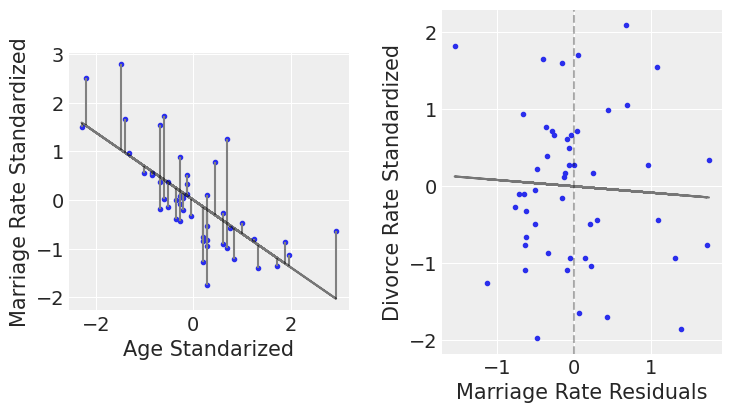

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(df_waf['age_stan'], df_waf['marriage_stan'], marker='.')
ax1.plot(df_waf['age_stan'], mu_means_5_4, 'k-', alpha=0.5)
ax1.vlines(df_waf['age_stan'], mu_means_5_4.values, mu_means_5_4.values + residuals_marriage, colors='grey')

ax1.set_xlabel('Age Standarized')
ax1.set_ylabel('Marriage Rate Standardized')
ax1.set_aspect('equal')

ax2.scatter(residuals_marriage, df_waf['divorce_stan'], marker='.')
ax2.axvline(x=0.0, ls='--', color='k', alpha=0.3)

ax2.set_xlabel('Marriage Rate Residuals')
ax2.set_ylabel('Divorce Rate Standardized')
ax2.set_aspect('equal')


m, c = np.polyfit(residuals_marriage, df_waf['divorce_stan'], deg=1)
fitted_line = [m * x + c for x in residuals_marriage]

ax2.plot(residuals_marriage, fitted_line, 'k-', alpha=0.5)

plt.show()

The plot of the divorce rate against the marriage rate residuals can be thought of as a plot of the divorce rate against the marriage rate after controlling the median age at marriage. As the plot shows, there is very little variation of the divorce rate with the residuals suggesting that the divorce rate is not causally related to the marriage rate (as in having a a directed arrow from $M$ to $D$). 

## Median age against marriage rate
$$
\begin{align*}
    A_i     & \sim N(\mu_i, \sigma) \\
    \mu_i   & \sim \alpha + \beta_M \cdot M_i\\
    \alpha  & \sim N(0, 0.2) \\
    \beta_M & \sim N(0, 0.5) \\
    \sigma  & \sim \text{Exponential}(1)
\end{align*}
$$

In [11]:
with pm.Model() as m_5_5:
    alpha = pm.Normal('alpha', mu=0.0, sigma=0.2)
    beta_M = pm.Normal('beta_M', mu=0.0, sigma=0.5)
    sigma = pm.Exponential('sigma', lam=1.0)
    
    mu = pm.Deterministic('mu', alpha + beta_M * df_waf['marriage_stan'])
    A = pm.Normal('age', mu=mu, sigma=sigma, observed=df_waf['age_stan'])
    
    trace_5_5 = pm.sample(5000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_M, alpha]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 11 seconds.


In [12]:
df_tr_5_5 = pm.trace_to_dataframe(trace_5_5)
df_tr_5_5.head()

,alpha,beta_M,sigma,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,...,mu__40,mu__41,mu__42,mu__43,mu__44,mu__45,mu__46,mu__47,mu__48,mu__49
0,-0.150575,-0.968114,0.662732,-0.172498,-1.650960,-0.197988,-1.752923,0.107901,-1.013692,0.617715,...,-0.147007,0.031428,-0.503877,-2.568627,0.796151,-0.248970,-0.478386,-0.682312,0.592225,-2.849025
1,0.098778,-0.410910,0.709432,0.089473,-0.538052,0.078654,-0.581329,0.208487,-0.267567,0.424874,...,0.100293,0.176028,-0.051179,-0.927550,0.500610,0.057015,-0.040359,-0.126915,0.414055,-1.046563
2,-0.022285,-0.758566,0.790491,-0.039462,-1.197912,-0.059435,-1.277805,0.180244,-0.698580,0.579710,...,-0.019489,0.120324,-0.299115,-1.916950,0.719522,-0.099382,-0.279141,-0.438928,0.559736,-2.136656
3,0.028715,-0.913759,0.787105,0.008024,-1.387430,-0.016036,-1.483668,0.272679,-0.785941,0.753870,...,0.032083,0.200500,-0.304750,-2.253574,0.922287,-0.064155,-0.280691,-0.473167,0.729810,-2.518229
4,-0.095116,-0.778923,0.778185,-0.112754,-1.302292,-0.133263,-1.384330,0.112848,-0.789560,0.523034,...,-0.092245,0.051320,-0.379375,-2.040627,0.666599,-0.174282,-0.358865,-0.522940,0.502525,-2.266229


In [13]:
df_mu_5_5 = df_tr_5_5.filter(regex='(mu.*)')

mu_means_5_5 = df_mu_5_5.apply(np.mean, axis=0)
residuals_age = df_waf['age_stan'].values - mu_means_5_5.values

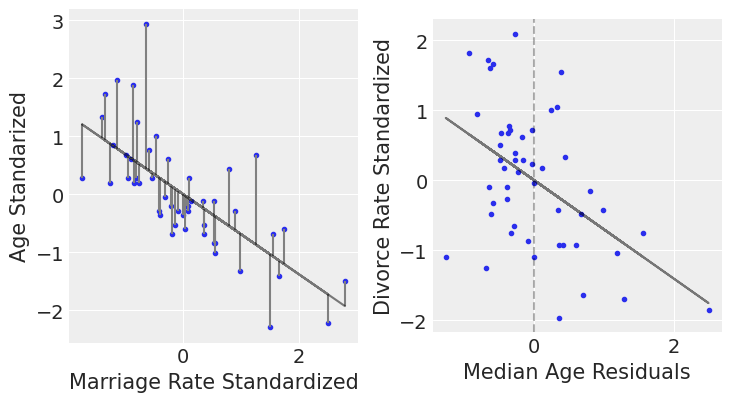

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(df_waf['marriage_stan'], df_waf['age_stan'], marker='.')
ax1.plot(df_waf['marriage_stan'], mu_means_5_5, 'k-', alpha=0.5)
ax1.vlines(df_waf['marriage_stan'], mu_means_5_5.values, mu_means_5_5.values + residuals_age, colors='grey')

ax1.set_ylabel('Age Standarized')
ax1.set_xlabel('Marriage Rate Standardized')
ax1.set_aspect('equal')

ax2.scatter(residuals_age, df_waf['divorce_stan'], marker='.')
ax2.axvline(x=0.0, ls='--', color='k', alpha=0.3)

ax2.set_xlabel('Median Age Residuals')
ax2.set_ylabel('Divorce Rate Standardized')
ax2.set_aspect('equal')


m, c = np.polyfit(residuals_age, df_waf['divorce_stan'], deg=1)
fitted_line = [m * x + c for x in residuals_age]

ax2.plot(residuals_age, fitted_line, 'k-', alpha=0.5)

plt.show()

The plot of the divorce rate against the median age residuals suggests that there is indeed a causal relationship between the median age at marriage and the divorce rate. This can be generalized. If a response variable $Y$ is linearly related to $X_1, \ldots, X_p$ and we want to check whether $Y$ is causally related to $X_i$, where $1 \leq i \leq p$. We regress $X_i$ against $X_1, \ldots, X_{i - 1}, X_{i + 1}, \ldots, X_p$ and compute the residuals. If the residuals are correlated with the outcome $Y$, then this suggests that $Y$ is indeed causally related to $X_i$, assuming that the linear model is correct.

## Posterior Prediction Plots Model 5.3

$$
\begin{align*}
    D_i     & \sim N(\mu_i, \sigma) \\
    \mu_i   & \sim \alpha + \beta_A \cdot A_i + \beta_M \cdot M_i\\
    \alpha  & \sim N(0, 0.2) \\
    \beta_A & \sim N(0, 0.5) \\
    \beta_M & \sim N(0, 0.5) \\
    \sigma  & \sim \text{Exponential}(1)
\end{align*}
$$

### Code 5.15 and 5.16

In [15]:
with pm.Model() as m_5_3:
    alpha = pm.Normal('alpha', mu=0.0, sigma=0.2)
    beta_A = pm.Normal('beta_A', mu=0.0, sigma=0.5)
    beta_M = pm.Normal('beta_M', mu=0.0, sigma=0.5)
    sigma = pm.Exponential('sigma', lam=1.0)
    
    mu = pm.Deterministic('mu', alpha + beta_A * df_waf['age_stan'] + beta_M * df_waf['marriage_stan'])
    D = pm.Normal('divorce', mu=mu, sigma=sigma, observed=df_waf['divorce_stan'])
    
    trace_5_3 = pm.sample(5000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_M, beta_A, alpha]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 14 seconds.


In [16]:
df_tr_5_3 = pm.trace_to_dataframe(trace_5_3)

df_mu_5_3 = df_tr_5_3.filter(regex='(mu.*)')

mu_means_5_3 = df_mu_5_3.apply(np.mean, axis=0)

summary_all = az.summary(trace_5_3, hdi_prob=0.89)
summary_all.head()

/home/somnath/install/anaconda3/envs/stat-rethink-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,0.001,0.101,-0.162,0.159,0.001,0.001,18512.0,9895.0,18522.0,13991.0,1.0
beta_A,-0.607,0.158,-0.849,-0.342,0.001,0.001,11260.0,11260.0,11258.0,13173.0,1.0
beta_M,-0.060,0.158,-0.315,0.187,0.002,0.001,10788.0,10788.0,10800.0,12646.0,1.0
sigma,0.827,0.087,0.689,0.958,0.001,0.001,14200.0,14200.0,13752.0,10364.0,1.0
mu[0],0.368,0.136,0.156,0.588,0.001,0.001,14491.0,14187.0,14485.0,14592.0,1.0


In [17]:
summary_all.index

Index(['alpha', 'beta_A', 'beta_M', 'sigma', 'mu[0]', 'mu[1]', 'mu[2]',
       'mu[3]', 'mu[4]', 'mu[5]', 'mu[6]', 'mu[7]', 'mu[8]', 'mu[9]', 'mu[10]',
       'mu[11]', 'mu[12]', 'mu[13]', 'mu[14]', 'mu[15]', 'mu[16]', 'mu[17]',
       'mu[18]', 'mu[19]', 'mu[20]', 'mu[21]', 'mu[22]', 'mu[23]', 'mu[24]',
       'mu[25]', 'mu[26]', 'mu[27]', 'mu[28]', 'mu[29]', 'mu[30]', 'mu[31]',
       'mu[32]', 'mu[33]', 'mu[34]', 'mu[35]', 'mu[36]', 'mu[37]', 'mu[38]',
       'mu[39]', 'mu[40]', 'mu[41]', 'mu[42]', 'mu[43]', 'mu[44]', 'mu[45]',
       'mu[46]', 'mu[47]', 'mu[48]', 'mu[49]'],
      dtype='object')

In [18]:
summary_all.loc['mu[0]', :]

mean             0.368
sd               0.136
hdi_5.5%         0.156
hdi_94.5%        0.588
mcse_mean        0.001
mcse_sd          0.001
ess_mean     14491.000
ess_sd       14187.000
ess_bulk     14485.000
ess_tail     14592.000
r_hat            1.000
Name: mu[0], dtype: float64

In [19]:
summary_mu = summary_all.loc['mu[0]':].copy()
lower = summary_mu['hdi_5.5%']
upper = summary_mu['hdi_94.5%']

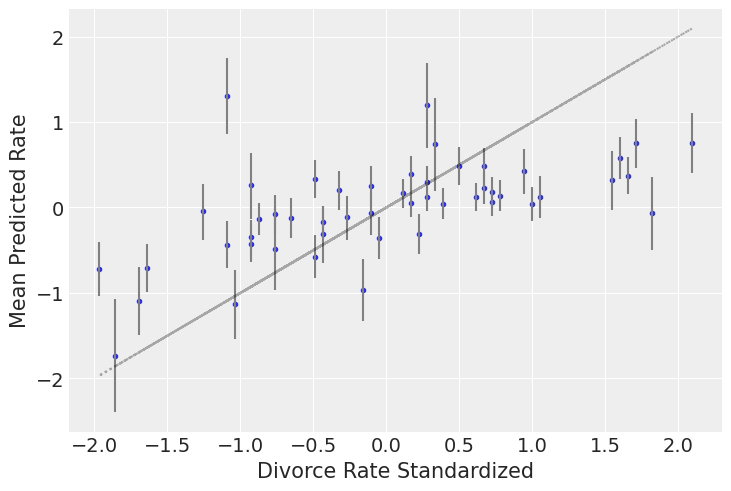

In [20]:
fig, ax = plt.subplots(1, 1)

ax.scatter(df_waf['divorce_stan'], mu_means_5_3.values, marker='.')
ax.vlines(df_waf['divorce_stan'], lower.values, upper.values, colors='grey')

ax.plot(df_waf['divorce_stan'], df_waf['divorce_stan'], color='black', linestyle=':', alpha=0.3)

ax.set_xlabel('Divorce Rate Standardized')
ax.set_ylabel('Mean Predicted Rate')

plt.show()

The dotted line shows where the predicted mean divorce rate equals the observed divorce rate. The model 
under-predicts states that have a high divorce rate whilst it over-predicts for states with a low divorce rate.   

## Simulating Spurious Associations

### Code 5.18

In [21]:
from scipy.stats import norm


N = 1000
x_real = norm.rvs(loc=0, scale=1, size=N)
x_spur = norm.rvs(loc=x_real, scale=1)
y = norm.rvs(loc=x_real, scale=1)

### The Model

$$
\begin{align*}
    y       & \sim N(\mu_i, \sigma) \\
    \mu_i   & \sim \alpha + \beta_r \cdot x_r + \beta_s \cdot x_s\\
    \alpha  & \sim N(0, 0.2) \\
    \beta_r & \sim N(0, 0.5) \\
    \beta_s & \sim N(0, 0.5) \\
    \sigma  & \sim \text{Exponential}(1)
\end{align*}
$$


where $x_r$ stands for the real causal predictor and $x_s$ is the spurious predictor.

In [22]:
with pm.Model() as m_spur:
    alpha = pm.Normal('alpha', mu=0.0, sigma=0.2)
    beta_r = pm.Normal('beta_r', mu=0.0, sigma=0.5)
    beta_s = pm.Normal('beta_s', mu=0.0, sigma=0.5)
    sigma = pm.Exponential('sigma', lam=1.0)
    
    mu = pm.Deterministic('mu', alpha + beta_r * x_real + beta_s * x_spur)
    Y = pm.Normal('outcome', mu=mu, sigma=sigma, observed=y)
    
    trace_spur = pm.sample(5000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_s, beta_r, alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 13 seconds.


In [23]:
summary = az.summary(trace_spur, var_names=['alpha', 'beta_r', 'beta_s'], hdi_prob=0.89)
summary

/home/somnath/install/anaconda3/envs/stat-rethink-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-0.022,0.030,-0.072,0.025,0.0,0.0,17654.0,13601.0,17645.0,13539.0,1.0
beta_r,1.015,0.043,0.947,1.083,0.0,0.0,12611.0,12611.0,12611.0,14389.0,1.0
beta_s,0.027,0.030,-0.021,0.076,0.0,0.0,12283.0,12123.0,12282.0,13643.0,1.0


As expected, the posterior mean of $\beta_s$ is close to $0$, whereas that of $\beta_r$ is $1$.